In [77]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import scipy
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [78]:
#DataFrame oluşturduk
df= pd.read_excel("Ise256.xlsx")


In [79]:
df.head()

,CODE,CBB,CBLGTH,CBWGT,CBMO,CBD,CBHR,CTHGHT,CTWGT,CTL,...,FBSM,FTHGHT,FTWGT,FTE,FTO,FTSM,FIB,FIT,FC,CBSEX
0,1111,2,20.0,6.6,3,4,4,55.7,85,5,...,10,70.1,171,3,8,10,33,150,6,0
1,1112,2,20.0,6.4,5,7,13,48.9,59,3,...,11,65.0,130,1,6,20,40,175,6,0
2,1113,7,19.8,6.1,6,2,4,54.9,70,2,...,20,70.0,175,2,6,0,44,116,1,0
3,1114,6,19.5,7.0,10,2,19,53.6,88,3,...,20,71.8,196,3,2,-1,42,112,4,0
4,1115,5,19.5,7.9,8,7,2,53.4,68,1,...,-1,68.0,163,2,6,-1,50,129,4,0


In [95]:
#Erkek ve kızlar 650 de simetrik ayrıldığı için 550 den 750 bir DataFrame oluştruk
df1=df[550:750]

**Q1**

Compute the mean, median and mode of the birth weights of babies.

In [81]:
#mean
df1["CTWGT"].mean()

73.045

In [82]:
#median
df1["CBWGT"].median()

7.55

In [83]:
df1["CBWGT"].mode()

0    6.9
1    7.6
Name: CBWGT, dtype: float64

Make a histogram of birth weights of girls and boys and check if there is a significant difference between
them.

In [84]:
weight_data = df1['CBWGT']
boys_weights = weight_data[df1['CBSEX'] == 1]
girls_weights = weight_data[df1['CBSEX'] == 0]

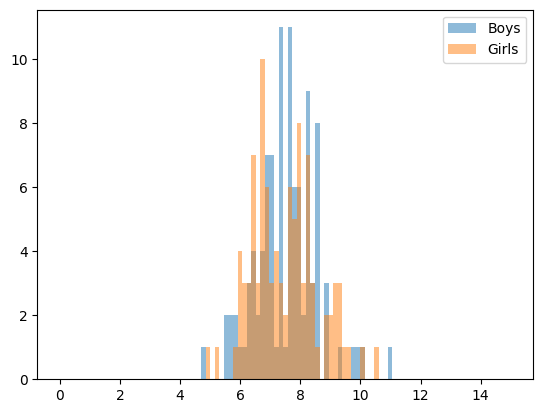

In [85]:
#Histogram
bins = np.linspace(0, 15, 100)

pyplot.hist(boys_weights, bins, alpha=0.5, label='Boys')
pyplot.hist(girls_weights, bins, alpha=0.5, label='Girls')
pyplot.legend(loc='upper right')
pyplot.show()

It is claimed that the birth weights of boys are greater than the birth weights of girls. Test this hypothesis for a
significance level 0.05.

In [86]:
#H0:boys.t_test=girls.t_test
#H1:boys.t_test>girls.t_test
# Performing the two-sample t-test
t_statistic, p_value = stats.ttest_ind(boys_weights, girls_weights, alternative='greater')

# Comparing the p-value with the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - There is evidence that boys' birth weights are greater than girls' birth weights.")
else:
    print("Fail to reject null hypothesis - There is no evidence that boys' birth weights are greater than girls' birth weights.")
    print(f"p value:{p_value} and our confidance interval is 0.05 so we fail to reject ")
    

Fail to reject null hypothesis - There is no evidence that boys' birth weights are greater than girls' birth weights.
p value:0.36443078232762494 and our confidance interval is 0.05 so we fail to reject 


Moreover, the varicance of birth weights is claimed to be equal to one. Check this claim by assuming the
births weights have a normal distribution.

In [87]:

x=np.array(boys_weights)
y=np.array(girls_weights)

#F test için fonkisyon tanımlıyorum
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
f_test_stat,p_value_f=f_test(boys_weights,girls_weights)

In [88]:
print(f_test_stat)
print(p_value_f)

0.8915762100100681
0.715935417710226


**Q2**


It is a well known hypothesis that the smoking of the mother during pregnancy may influence the health of the
baby. As a subquestion to this main question we want to investigate the question, if the smoking habit of the
mother is influencing the birthweight of the baby. We select randomly 50 babies of non-smoker mothers
(MBSM -1 or 0), 50 of heavy smoking mothers (more than 5 cigaretts per day, MBSM > 5).


 First make a box-plot and try to intepret what you see. Are there differences in the birthweigth? Are they
large?

In [89]:
mbsm_data=df1["MBSM"]

In [90]:
non_smoker_data=mbsm_data[df1["MBSM"]<=0]
smoker_data=mbsm_data[df1["MBSM"]>5]


boys_non_smoker = non_smoker_data[df1['CBSEX'] == 1]
girls_non_smoker = non_smoker_data[df1['CBSEX'] == 0]

boys_smoker = smoker_data[df1['CBSEX'] == 1]
girls_smoker = smoker_data[df1['CBSEX'] == 0]

    

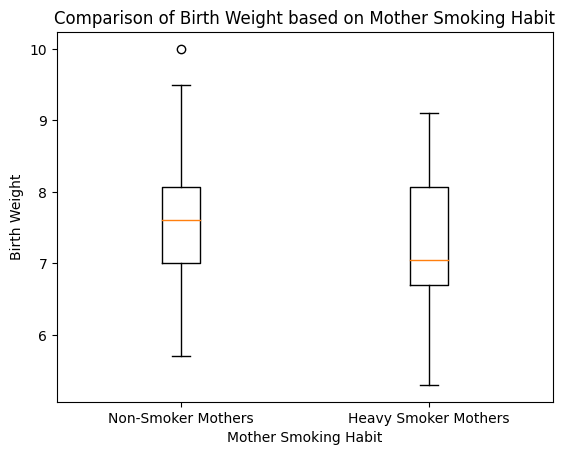

In [91]:


# Assuming 'df' is your DataFrame with the birth weight data
# and 'MBSM' is the column indicating the smoking habit of the mother (1 or 0 for non-smokers, >5 for heavy smokers)
weight_data = df1['CBWGT']
smoking_habit = df1['MBSM']

# Separating the birth weights based on the smoking habit of the mother
non_smoker_weights = weight_data[smoking_habit.isin([0, 1])].sample(n=38, replace=False)
heavy_smoker_weights = weight_data[smoking_habit > 5].sample(n=50, replace=False)

# Creating a box plot
plt.boxplot([non_smoker_weights, heavy_smoker_weights], labels=['Non-Smoker Mothers', 'Heavy Smoker Mothers'])
plt.xlabel('Mother Smoking Habit')
plt.ylabel('Birth Weight')
plt.title('Comparison of Birth Weight based on Mother Smoking Habit')
plt.show()


Make an appropriate test that you can also see if the differences between non-smokers and heavy-smokers
are significant. Interpret all meaninfull P-Values you get in the output (also state their H0).

**Q3**


We are interested to forecast the variable CTHGHT (Height of the child at the age of 12) by using any of the other
variables except those starting with CT. Of course we want to have a simple model. Start with looking at the
description of the variables and consider which one should help to forecast CTHGHT.

y=ß0+ß1*x+e  y=CTHGHT x=CTWGT


We think CTWGT is ß1


In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [97]:
X=df1["CTHGHT"]

In [109]:
y=np.array(X)

In [110]:
y

array([56.6, 51.6, 53.4, 57.4, 54.6, 52.4, 58.9, 57.2, 55.5, 51.1, 54. ,
       54.9, 50.1, 57.3, 55.2, 52.8, 50.6, 48.7, 53.9, 52.6, 51.9, 49.6,
       51.2, 56.5, 57.4, 54.3, 54.4, 52.8, 57.6, 54.8, 58.4, 58.5, 51.1,
       54.1, 51.1, 55.3, 52.2, 55.5, 57.2, 56. , 53.9, 51.8, 56.7, 53.2,
       47. , 55.2, 50.4, 52.3, 54.8, 51.3, 50.7, 54.4, 54.5, 58.1, 54. ,
       57.4, 56.2, 55.4, 57. , 54.4, 55.9, 52.8, 53.9, 50.4, 53.9, 52. ,
       53.9, 49.6, 54.2, 49.3, 53.1, 49.6, 51.6, 55.1, 55.6, 56.4, 56.5,
       55.3, 53.7, 54.9, 54.4, 56.7, 52.6, 53.4, 54.1, 53.9, 52.6, 50.5,
       56.1, 54.1, 54.6, 53.6, 56.3, 59.2, 49.9, 55.9, 47.8, 52. , 54.7,
       54.3, 52.4, 50.9, 51.1, 55.1, 50.8, 51.3, 54.9, 53. , 52.3, 55.1,
       55.5, 54.4, 56.1, 56.9, 50.2, 51.1, 52. , 49.4, 55.1, 51.3, 53.2,
       56.4, 55.9, 55.4, 49.3, 54. , 53.8, 52.5, 53.4, 54.1, 51.8, 51.1,
       53.3, 53.6, 52.5, 50.1, 52.9, 56.1, 53.1, 50.5, 53.1, 52.3, 51.4,
       50.4, 54.3, 51.4, 55.7, 57.6, 51.7, 52.8, 55

In [111]:
x=np.array(df1["CTWGT"])

In [112]:
x

array([ 84,  54, 106, 108,  67,  73,  84,  92,  73,  89,  89,  76,  58,
        80,  78,  72,  57,  56,  75,  68,  70,  64,  64,  81,  84,  98,
        73,  99,  98,  61,  98,  82,  66,  66,  59, 113,  60,  63,  88,
        69,  58,  64,  78,  55,  45,  76,  53,  70, 101,  70,  56,  72,
        60,  93,  64,  96,  78,  88,  89,  68,  79,  82,  91,  59,  77,
        75,  67,  50,  78,  56,  74,  56,  56,  94, 130,  74,  77, 101,
        69,  76,  76,  90,  65,  78,  70,  94,  72,  58,  82, 116,  68,
        66,  77, 111,  55,  85,  55,  66,  94,  89,  66,  59,  56,  63,
        59,  63,  86,  68,  67,  61,  66,  73,  72,  88,  58,  54,  68,
        54,  74,  62,  71,  84,  78,  72,  55,  70,  70,  68,  70,  68,
        59,  52,  85,  62,  71,  58,  87,  67,  56,  60,  71,  60,  58,
        57,  70,  70,  86,  80,  64,  78,  81,  86,  64,  82,  90,  67,
        82,  96,  68,  60,  66,  72,  75,  70,  96,  69,  77,  61,  60,
        84,  69,  67,  60,  73,  72,  64,  70,  89,  70,  56,  6

In [113]:
model=LinearRegression()

In [115]:
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [118]:
print(model.predict([[84]]))

[54.95106514]
